# Demo VirtualHome

In [1]:
%matplotlib notebook
import IPython.display
from utils_demo import *
import display_graph

In [2]:
comm = setup()

We will start scene number 4 and start visualizing it. We start it by calling reset. Scenes are numbered from 0 to 6.

In [3]:
comm.reset(4)

True

In [4]:
s, graph = comm.environment_graph()
print(s)
print(type(graph))
print(graph.keys())

True
<class 'dict'>
dict_keys(['nodes', 'edges'])


The graph is a dictionary with `nodes` and `edges`. Each node corresponds to an object and contains information such as.
- class_name: the object_name
- states: in which state the object is
- id: a number you can use to perform actions over the object 

Let's print one of the nodes, to see more of the information

In [5]:
graph['nodes'][140]

{'id': 141,
 'category': 'Appliances',
 'class_name': 'fridge',
 'prefab_name': 'PRE_APP_Fridge_01_04',
 'bounding_box': {'center': [7.07990456, 1.06300008, -3.06112313],
  'size': [0.711999357, 2.12600017, 0.8900006]},
 'properties': ['CAN_OPEN', 'CONTAINERS', 'HAS_PLUG'],
 'states': ['CLOSED']}

The edges connect object ids with spatial relationships, such as `INSIDE`, `ON`, `CLOSE`. You can check more of them in the `simulation` folder.

In [6]:
graph['edges'][:5]

[{'from_id': 2, 'to_id': 1, 'relation_type': 'INSIDE'},
 {'from_id': 3, 'to_id': 1, 'relation_type': 'INSIDE'},
 {'from_id': 4, 'to_id': 1, 'relation_type': 'INSIDE'},
 {'from_id': 5, 'to_id': 1, 'relation_type': 'INSIDE'},
 {'from_id': 6, 'to_id': 1, 'relation_type': 'INSIDE'}]

The graph also contains bounding box and center information, which may be useful to reason about the environment layout.

In [7]:
display_graph.display(graph)

<IPython.core.display.Javascript object>

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

# Modifying your environment and preparing for activities

All the environments have a default setting. We can go to this setting by calling reset()

In [8]:
comm.reset()

True

## Adding Objects

We will start by adding objects to interact with in the environments. We can start by adding a cat in the environment.

### Adding a cat

We first want to make sure that the cat will be added in the current environment. Let's say that we want to add it in one of the sofas.

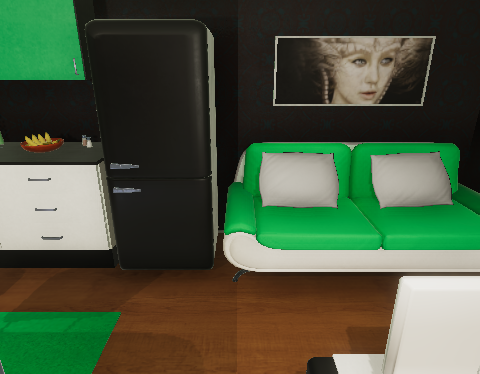

In [9]:
imgs_prev = get_scene_cameras(comm, [-4], mode='normal')  # mode can be 'normal', 'seg_class', 'seg_inst', 'depth'
display_grid_img(imgs_prev, nrows=1)

We start by reading the graph and looking for one of the sofas in the scene.

In [10]:
success, graph = comm.environment_graph();
# find_nodes is a utility function that takes in the graph dictionary and find elements that match the criteria
sofa = find_nodes(graph, class_name='sofa')[-2]
print(sofa)

{'id': 131, 'category': 'Furniture', 'class_name': 'sofa', 'prefab_name': 'PRE_FUR_Sofa_02_03_02_01', 'bounding_box': {'center': [6.89529371, 0.5715897, -4.879], 'size': [0.9469976, 0.885002553, 2.155935]}, 'properties': ['SITTABLE', 'LIEABLE'], 'states': []}


We now add one node with id `1000` of type cat, and an edge between the sofa node and the cat, specifying that the cat should be on the sofa.

Q: Why bounding box does not need to be specified?
Answer will be provided later

In [11]:
add_node(graph, {'class_name': 'cat', 
                   'category': 'Animals', 
                   'id': 1000, 
                   'properties': [], 
                   'states': []})
add_edge(graph, 1000, 'ON', sofa['id'])

#### Update environment

The graph is now updated, but now we have to call the simulator so that the environment gets updated with the graph. Let's do it.

In [12]:
success, message = comm.expand_scene(graph)

The environment has now a new cat, being placed on top of the sofa.

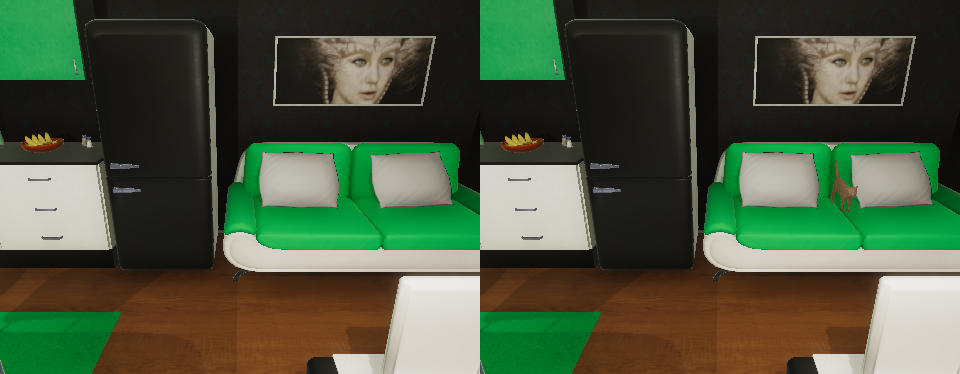

In [13]:
imgs_final = get_scene_cameras(comm, [-4])
display_grid_img(imgs_prev+imgs_final, nrows=1)

The bounding box of the newly added cat is probably infered by the unity simulation, as shown below 

In [15]:
success, graph = comm.environment_graph()
cat = find_nodes(graph, class_name='cat')[0]
print(cat)

{'id': 1000, 'category': 'Animals', 'class_name': 'cat', 'prefab_name': None, 'bounding_box': {'center': [6.89529371, 0.7671198, -4.879], 'size': [0.533024, 0.368744016, 0.136014074]}, 'properties': [], 'states': []}


Let's see if spatial relations (i.e., graph edges connecting cat and other objects) are automatically inferred? 

In [16]:
connected_nodes = find_edges_from(graph, cat['id'])
print(connected_nodes)

[('ON', {'id': 131, 'category': 'Furniture', 'class_name': 'sofa', 'prefab_name': 'PRE_FUR_Sofa_02_03_02_01', 'bounding_box': {'center': [6.89529371, 0.5715897, -4.879], 'size': [0.9469976, 0.885002553, 2.155935]}, 'properties': ['SITTABLE', 'LIEABLE'], 'states': []})]


Sadly, other spatial relations are not automatically inferred

### Play with other spatial relations

Let's see what relations are in the graph currently

In [17]:
relation_types = set()
for e in graph['edges']:
    relation_types.add(e['relation_type'])
print(relation_types)

{'BETWEEN', 'ON', 'CLOSE', 'INSIDE', 'FACING'}


Find objects that are ***CLOSE*** to the sofa

In [18]:
connected_nodes = find_edges_from(graph, sofa['id'])
close_objects = []
for n in connected_nodes:
    if n[0] == 'CLOSE':
        close_objects.append(n[1])
print(close_objects)

[{'id': 178, 'category': 'Decor', 'class_name': 'pillow', 'prefab_name': 'PRE_DEC_Pillow_01_08', 'bounding_box': {'center': [6.991634, 0.8167001, -5.36731243], 'size': [0.631489038, 0.7416425, 0.874763131]}, 'properties': ['GRABBABLE'], 'states': []}, {'id': 179, 'category': 'Decor', 'class_name': 'pillow', 'prefab_name': 'PRE_DEC_Pillow_01_07', 'bounding_box': {'center': [6.991633, 0.8166995, -4.306353], 'size': [0.6239811, 0.723006248, 0.861265361]}, 'properties': ['GRABBABLE'], 'states': []}, {'id': 104, 'category': 'Floor', 'class_name': 'floor', 'prefab_name': 'PRE_FLO_Tile_07', 'bounding_box': {'center': [6.25, 0.0, -4.978], 'size': [2.5, 9.049975e-06, 2.5]}, 'properties': [], 'states': []}, {'id': 112, 'category': 'Walls', 'class_name': 'wall', 'prefab_name': 'PRE_WAL_WAL_Corner_02_05_01', 'bounding_box': {'center': [6.249998, 1.25, -4.978], 'size': [2.50000381, 2.500009, 2.50000429]}, 'properties': [], 'states': []}, {'id': 182, 'category': 'Decor', 'class_name': 'wallpicturefr

Let's try add another cat by specifying that the cat is close to the sofa

False {'unplaced': ['cat']}


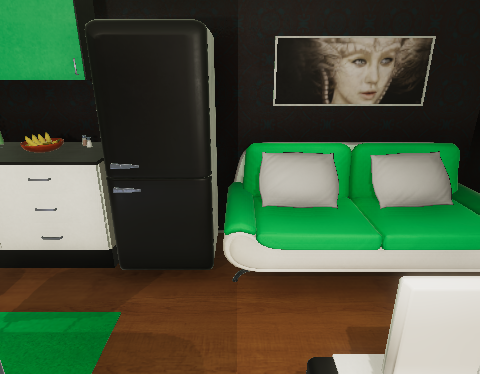

In [20]:
comm.reset()
success, graph = comm.environment_graph();
# find_nodes is a utility function that takes in the graph dictionary and find elements that match the criteria
sofa = find_nodes(graph, class_name='sofa')[-2]

add_node(graph, {'class_name': 'cat', 
                   'category': 'Animal', 
                   'id': 1001, 
                   'properties': [], 
                   'states': []})
add_edge(graph, 1001, 'CLOSE', sofa['id'])
success, message = comm.expand_scene(graph)
print(success, message)
imgs_prev = get_scene_cameras(comm, [-4], mode='normal')  # mode can be 'normal', 'seg_class', 'seg_inst', 'depth'
display_grid_img(imgs_prev, nrows=1)

Unfortunately, adding spatial relation ***CLOSE*** doesn't work 